<a href="https://colab.research.google.com/github/benvictoria21/python-stock-/blob/master/JPMorgan_Chase_%26_Co_(JPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=58b6824ad9359eec621a5651c676421318972363e55621732af25527bf53945e
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
JPM = yfinance.download("JPM")

JPM

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,5.129630,5.018518,5.037037,0.287775,62400
1980-03-18,0.000000,5.111111,5.037037,5.074074,0.289891,63900
1980-03-19,0.000000,5.166667,5.111111,5.148148,0.294123,40500
1980-03-20,0.000000,5.148148,5.092593,5.111111,0.292007,18900
1980-03-21,0.000000,5.222222,5.111111,5.222222,0.298355,97200
...,...,...,...,...,...,...
2020-08-27,99.000000,102.650002,99.000000,102.349998,102.349998,22163900
2020-08-28,103.139999,103.250000,101.809998,102.769997,102.769997,13756700
2020-08-31,102.120003,102.180000,100.019997,100.190002,100.190002,14219400


In [4]:
JPM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,5.129630,5.018518,5.037037,0.287775,62400
1980-03-18,0.0,5.111111,5.037037,5.074074,0.289891,63900
1980-03-19,0.0,5.166667,5.111111,5.148148,0.294123,40500
1980-03-20,0.0,5.148148,5.092593,5.111111,0.292007,18900
1980-03-21,0.0,5.222222,5.111111,5.222222,0.298355,97200


In [5]:
JPM.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-27,99.000000,102.650002,99.000000,102.349998,102.349998,22163900
2020-08-28,103.139999,103.250000,101.809998,102.769997,102.769997,13756700
2020-08-31,102.120003,102.180000,100.019997,100.190002,100.190002,14219400
2020-09-01,99.550003,100.870003,99.040001,100.139999,100.139999,11595600
2020-09-02,99.550003,101.900002,99.559998,100.688698,100.688698,8860848


In [6]:
JPM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,1.020500e+04
mean,35.422769,36.605568,35.754347,36.184215,25.385692,1.193044e+07
std,29.131028,28.551275,28.045841,28.294649,28.835505,1.708462e+07
min,0.000000,3.625000,3.208333,3.375000,0.286717,1.110000e+04
25%,12.333333,12.416667,12.166667,12.291667,1.593433,1.118700e+06
50%,34.770000,35.200001,34.259998,34.700001,21.356956,7.036300e+06
75%,47.840000,48.419998,47.250000,47.799999,32.584648,1.455800e+07
max,139.899994,141.100006,139.259995,141.089996,137.409225,2.172942e+08


In [7]:
JPM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10205 entries, 1980-03-17 to 2020-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10205 non-null  float64
 1   High       10205 non-null  float64
 2   Low        10205 non-null  float64
 3   Close      10205 non-null  float64
 4   Adj Close  10205 non-null  float64
 5   Volume     10205 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 558.1 KB


In [8]:
JPM.info

<bound method DataFrame.info of                   Open        High  ...   Adj Close    Volume
Date                                ...                      
1980-03-17    0.000000    5.129630  ...    0.287775     62400
1980-03-18    0.000000    5.111111  ...    0.289891     63900
1980-03-19    0.000000    5.166667  ...    0.294123     40500
1980-03-20    0.000000    5.148148  ...    0.292007     18900
1980-03-21    0.000000    5.222222  ...    0.298355     97200
...                ...         ...  ...         ...       ...
2020-08-27   99.000000  102.650002  ...  102.349998  22163900
2020-08-28  103.139999  103.250000  ...  102.769997  13756700
2020-08-31  102.120003  102.180000  ...  100.190002  14219400
2020-09-01   99.550003  100.870003  ...  100.139999  11595600
2020-09-02   99.550003  101.900002  ...  100.688698   8860848

[10205 rows x 6 columns]>

In [9]:
import sqlite3

In [10]:
conn = sqlite3.connect("JPM.db")
c = conn.cursor()

In [11]:
conn = sqlite3.connect("JPM.db")
c = conn.cursor()

In [12]:
JPM.to_sql("JPM", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
#See data
c.execute("""SELECT * FROM JPM""")
rows = c.fetchall()
rows

[('1980-03-17 00:00:00',
  0.0,
  5.129629611968994,
  5.018518447875977,
  5.037036895751953,
  0.2877748906612396,
  62400),
 ('1980-03-18 00:00:00',
  0.0,
  5.111111164093018,
  5.037036895751953,
  5.0740742683410645,
  0.28989076614379883,
  63900),
 ('1980-03-19 00:00:00',
  0.0,
  5.166666507720947,
  5.111111164093018,
  5.148148059844971,
  0.2941228747367859,
  40500),
 ('1980-03-20 00:00:00',
  0.0,
  5.148148059844971,
  5.092592716217041,
  5.111111164093018,
  0.2920069396495819,
  18900),
 ('1980-03-21 00:00:00',
  0.0,
  5.222222328186035,
  5.111111164093018,
  5.222222328186035,
  0.2983548939228058,
  97200),
 ('1980-03-24 00:00:00',
  0.0,
  5.185184955596924,
  5.092592716217041,
  5.092592716217041,
  0.29094889760017395,
  90300),
 ('1980-03-25 00:00:00',
  0.0,
  5.111111164093018,
  5.05555534362793,
  5.0740742683410645,
  0.28989076614379883,
  72000),
 ('1980-03-26 00:00:00',
  0.0,
  5.148148059844971,
  5.037036895751953,
  5.111111164093018,
  0.29200693

In [14]:
JPM.to_excel("JPM.xls")

pd.read_excel("JPM.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,5.129630,5.018518,5.037037,0.287775,62400
1,1980-03-18,0.000000,5.111111,5.037037,5.074074,0.289891,63900
2,1980-03-19,0.000000,5.166667,5.111111,5.148148,0.294123,40500
3,1980-03-20,0.000000,5.148148,5.092593,5.111111,0.292007,18900
4,1980-03-21,0.000000,5.222222,5.111111,5.222222,0.298355,97200
...,...,...,...,...,...,...,...
10200,2020-08-27,99.000000,102.650002,99.000000,102.349998,102.349998,22163900
10201,2020-08-28,103.139999,103.250000,101.809998,102.769997,102.769997,13756700
10202,2020-08-31,102.120003,102.180000,100.019997,100.190002,100.190002,14219400
10203,2020-09-01,99.550003,100.870003,99.040001,100.139999,100.139999,11595600


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


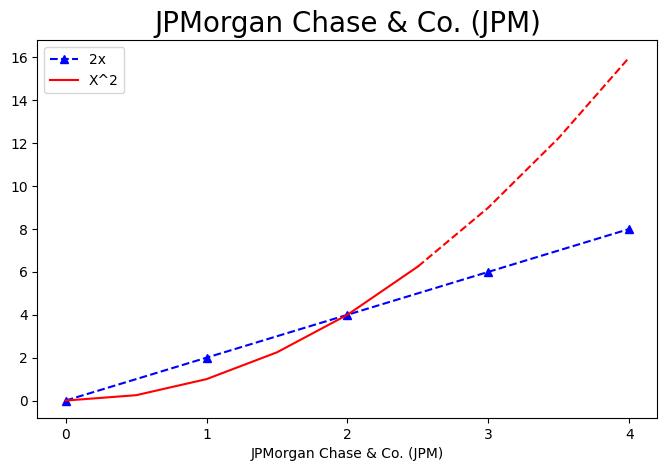

In [15]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('JPMorgan Chase & Co. (JPM)', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('JPMorgan Chase & Co. (JPM)')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

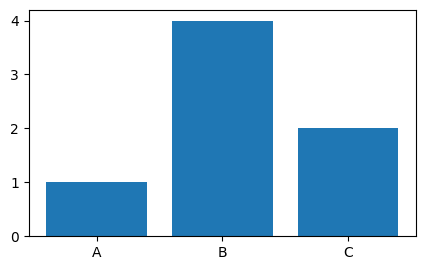

In [16]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)